In [1]:
import pandas as pd
import numpy as np
import attrge

In [2]:
sales_2020=pd.read_csv('AdventureWorks Sales Data 2020.csv')

In [3]:
sales_2021=pd.read_csv('AdventureWorks Sales Data 2021.csv')

In [4]:
sales_2022=pd.read_csv('AdventureWorks Sales Data 2022.csv')

In [5]:
sales_data=pd.concat([sales_2020,sales_2021,sales_2022],ignore_index=True)

In [8]:
sales_data['OrderDate']=pd.to_datetime(sales_data['OrderDate'])

In [14]:
sales_data['Cohort']=sales_data.groupby('CustomerKey')['OrderDate'].transform('min').dt.to_period('M')

In [18]:
sales_data['Month']=sales_data['OrderDate'].dt.to_period('M')

In [25]:
cohort_table=sales_data.groupby(['Cohort','Month']).agg(n_customers=('CustomerKey','nunique')).reset_index(drop=False)

In [31]:
cohort_table['PeriodNumber']=(cohort_table['Month']-cohort_table['Cohort']).apply(lambda x:x.n)
cohort_table

,Cohort,Month,n_customers,PeriodNumber
0,2020-01,2020-01,184,0
1,2020-01,2021-07,18,18
2,2020-01,2021-08,8,19
3,2020-01,2021-09,29,20
4,2020-01,2021-10,18,21
...,...,...,...,...
306,2022-04,2022-05,22,1
307,2022-04,2022-06,29,2
308,2022-05,2022-05,1241,0
309,2022-05,2022-06,19,1


In [35]:
cohort_pivot=pd.pivot_table(cohort_table,values='n_customers',columns='PeriodNumber',index='Cohort')

In [36]:
cohort_size=cohort_pivot.iloc[:,0]

In [39]:
retention_matrix=cohort_pivot.divide(cohort_size,axis=0)

In [49]:
print(retention_matrix)

PeriodNumber   0         1         2         3         4         5         6   \
Cohort                                                                          
2020-01       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-02       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-03       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-04       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-05       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-06       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-07       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-08       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-09       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-10       1.0       NaN       NaN       NaN       NaN       NaN       NaN   
2020-11       1.0       NaN 

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='PeriodNumber', ylabel='Cohort'>

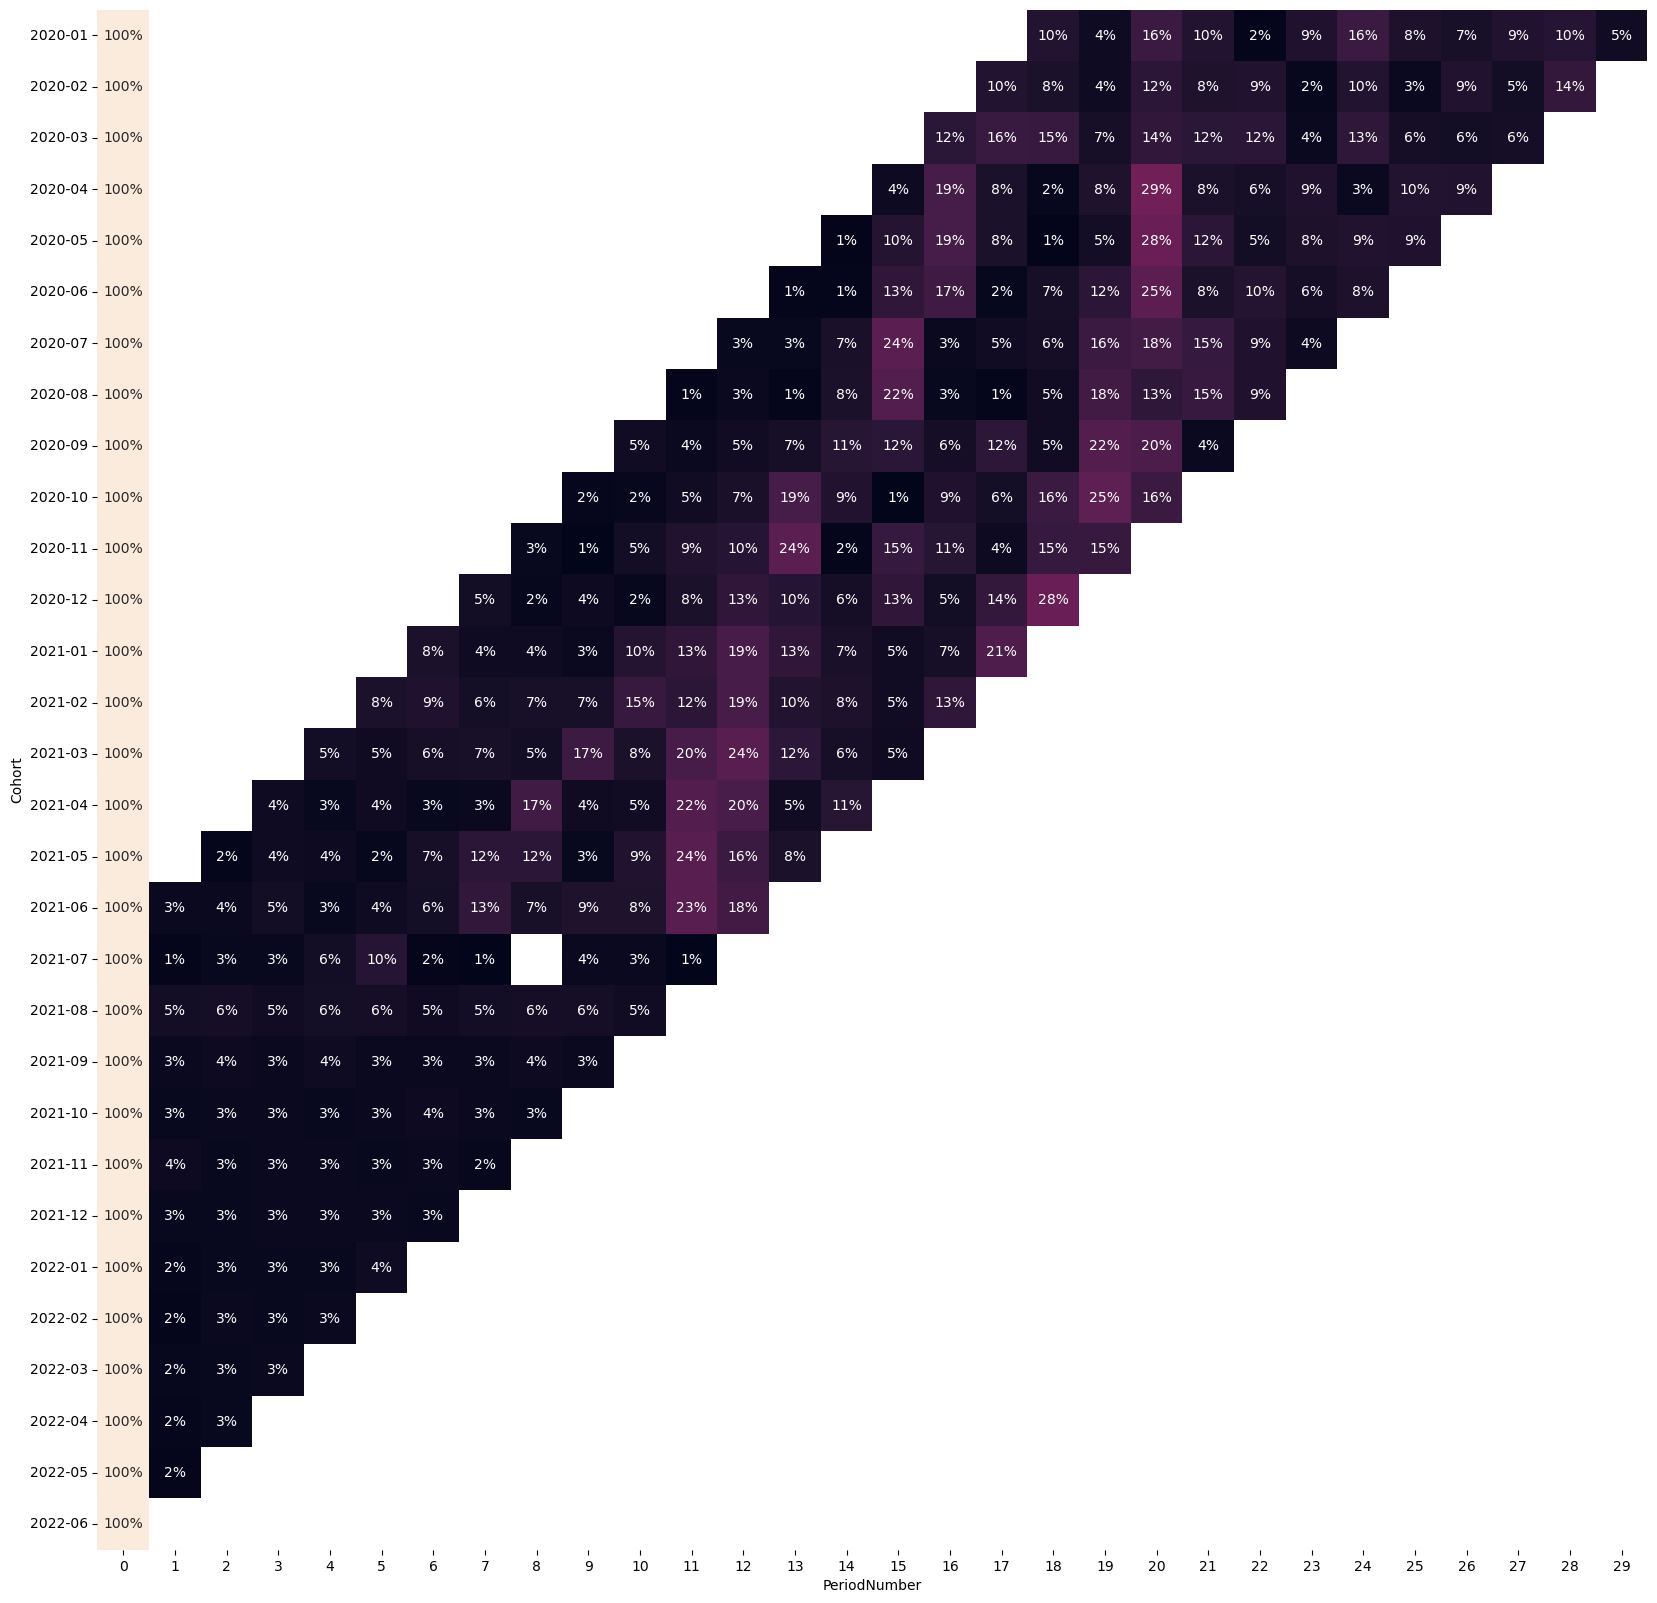

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(retention_matrix,fmt='.0%',annot=True,cbar=False,)